In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 783 		 0.09 		 0.05 |
| 2837 		 0.45 		 0.28 |
| 3263 		 0.59 		 0.1 |
| 1708 		 0.13 		 0.35 |
| 3396 		 0.01 		 0.33 |
| 3575 		 0.01 		 0.1 |
| 2244 		 0.22 		 0.05 |
| 889 		 0.2 		 0.15 |
| 1841 		 0.01 		 0.27 |
| 102 		 0.16 		 0.3 |
| 3717 		 0.16 		 0.19 |
| 1398 		 0.26 		 0.35 |
| 5188 		 0.03 		 0.07 |
| 102 		 0.12 		 0.17 |
| 483 		 0.24 		 0.19 |
| 2028 		 0.3 		 0.31 |
| 542 		 0.16 		 0.16 |
| 7453 		 0.07 		 0.43 |
| 1604 		 0.24 		 0.0 |
-------------------------------------
The s.d. of M is: 1447.0
The s.d. of E is: 0.15
The s.d. of I is: 0.16
-------------------------------------
The mean of M is: 2243
The mean of E is: 0.22
The mean of I is: 0.2
-------------------------------------


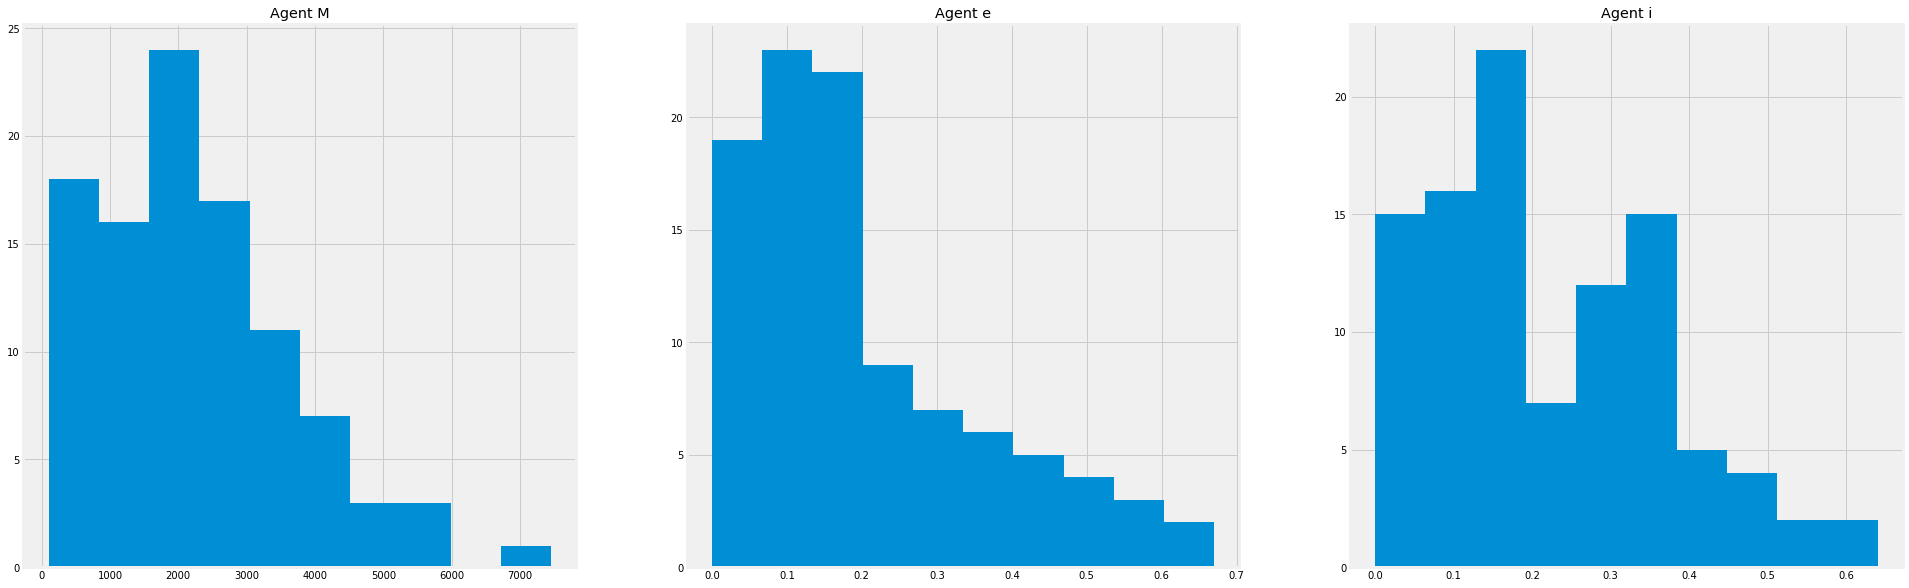

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 191.0, Temptation: 255.0, Sucker: -64.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 333.0, Temptation: 352.0, Sucker: -20.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 197.0, Temptation: 294.0, Sucker: -96.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 455.0, Temptation: 462.0, Sucker: -7.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 143.0, Temptation: 154.0, Sucker: -11.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 77.0, Temptation: 102.0

In [2]:
# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 16 minutes.
    S.D.  Counts
0    0.5     223
1    0.6     199
2    0.7     216
3    0.8     181
4    0.9     163
5    1.0     167
6    1.1     142
7    1.2     122
8    1.3     115
9    1.4     116
10   1.5      72
11   1.6      54
12   1.7      40
13   1.8      31
14   1.9      39
15   2.0      30
16   2.1      32
17   2.2      25
18   2.3      19
19   2.4      15
20   2.5       5
21   2.6       2
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


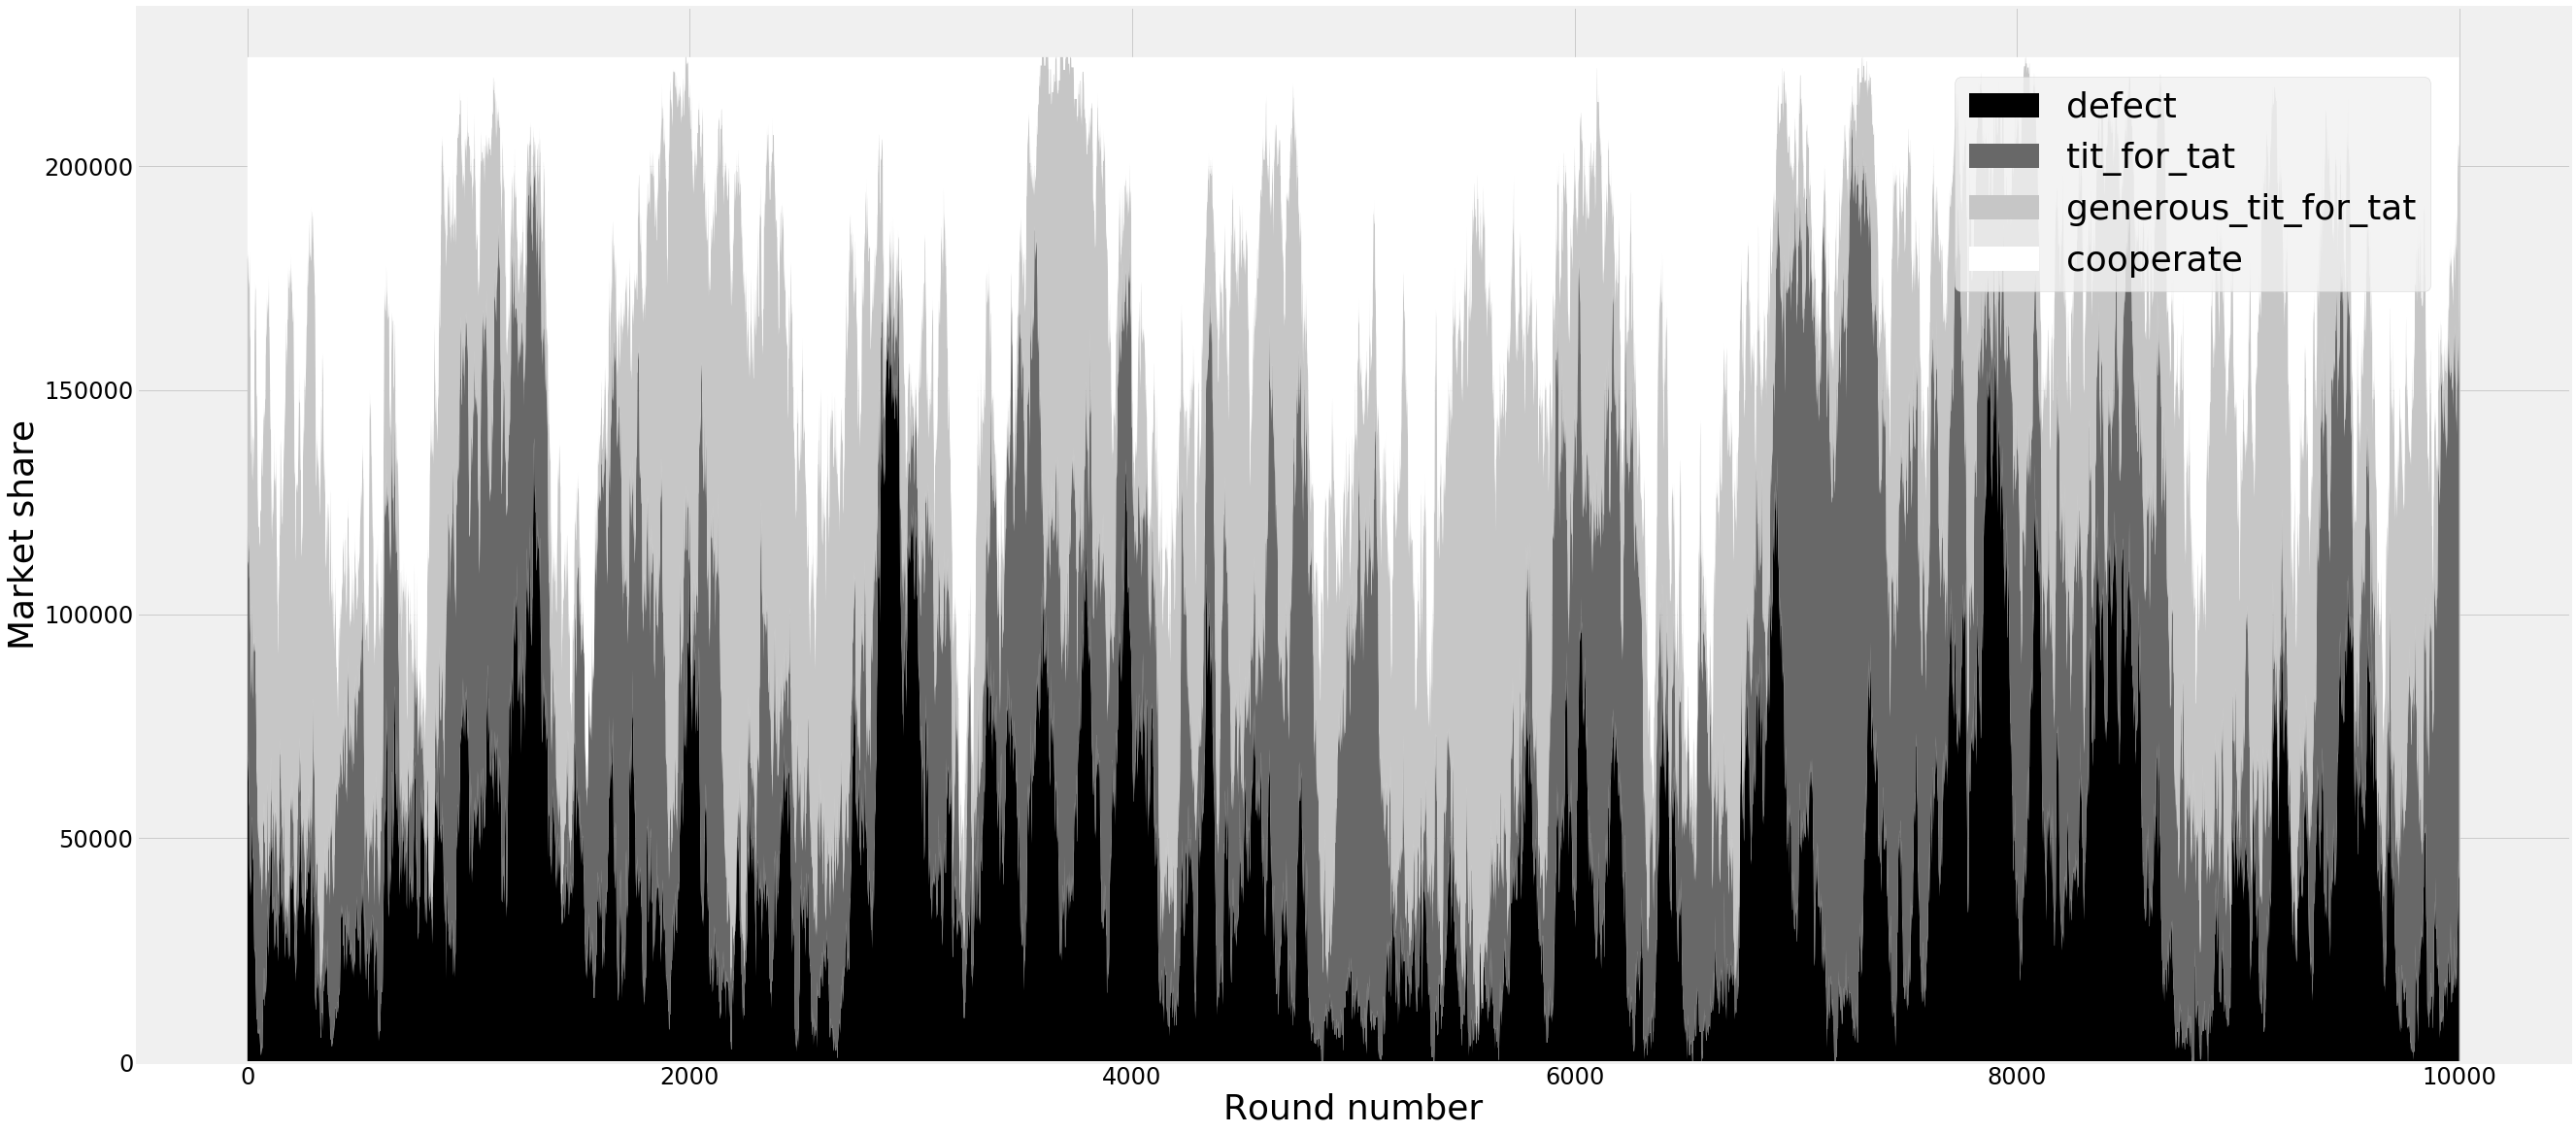

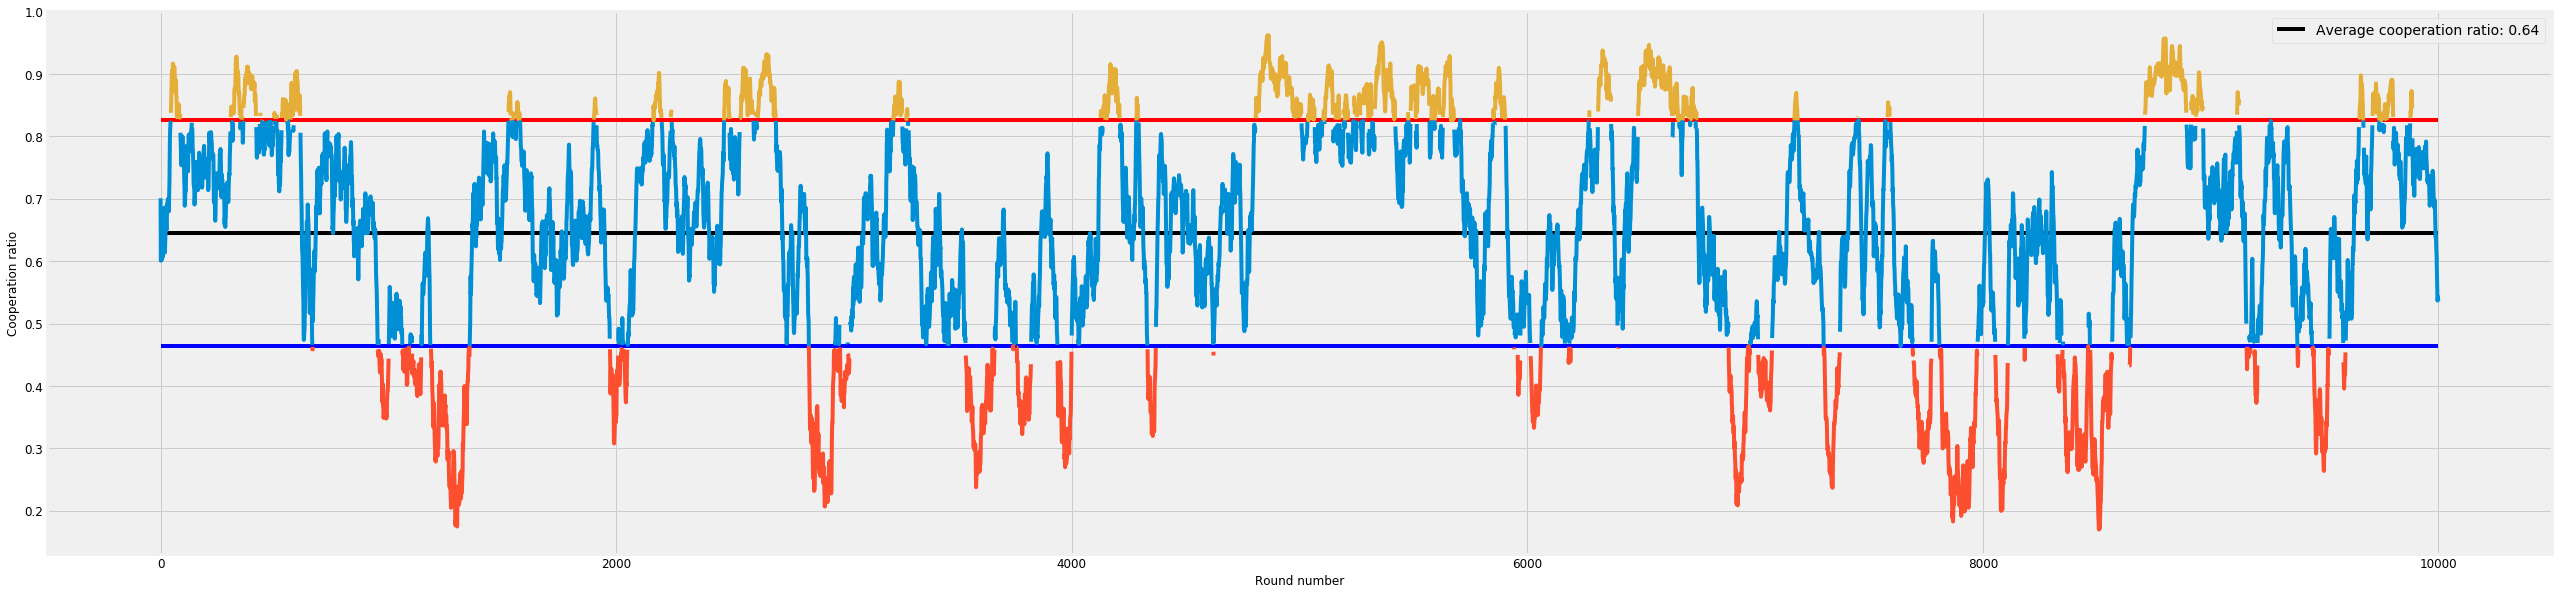

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "complete_heterogeneity", seed = str(seed))